# “Should This Loan be Approved or Denied?”
In this notebook I have preapered some data to predict a loand request should be approved or not using SVM (Support-Vector Machine), Decision Tree, and Logistic Regression Classification algorithms 


# 1.Importing necessary libraries
Before everything we have to import the libraries which we want to use such as: pandas, numpy, matplotlib, seaborn, math, warnings, etc. 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import datetime
import math
from datetime import date
from scipy import stats
 
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# Imbalance Dataset
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
 
# Model Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve
 
# Modelling Algoritm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
 
import warnings
warnings.simplefilter(action='ignore')
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1.1.installing sckit-plot 

In [2]:
!pip install scikit-plot
import scikitplot as skplt

# 2.Loading the dataset 
I have gotten my dataset (a raw dataset) from an article that was a assignment for some student and there was no available source code on it.
Also the dataset was raw and many times took to prepare for modeling.
The following link is the link of the article that I have downloaded the dataset from:
https://www.tandfonline.com/doi/full/10.1080/10691898.2018.1434342?scroll=top&needAccess=true  

## 2.1.Mounting the google drive to load the dataset 
I have put on my google drive to ease the trend

In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [4]:
SBAdata = pd.read_csv('/content/mydrive/My Drive/bigdata/SBAnational.csv')
SBAdata.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
# showing the null values number
SBAdata.isnull().sum()


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [6]:
# types of columns
SBAdata.dtypes


LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

# 3.Preparing the data 




## 3.1changing the columns' format
The methods are the same.
* first change the string values to numerical values

* change the type of column to numeric


In [7]:
# changing the date formats
date_col = ['ApprovalDate', 'ChgOffDate','DisbursementDate']
SBAdata[date_col] = pd.to_datetime(SBAdata[date_col].stack(),format='%d-%b-%y').unstack()


In [8]:
# fixing some values which are typo error
SBAdata['ApprovalFY'].replace('1976A', 1976, inplace=True)
# changing the type of ApprovalFY column to int
SBAdata['ApprovalFY']= SBAdata['ApprovalFY'].astype(int)


In [9]:
#changing the money columns to float and remove some symbol or character
curr_col = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

SBAdata[curr_col] = SBAdata[curr_col].replace('[\$,]', '', regex=True).astype(float) 

In [10]:
# changing the values of target value from string to int 
SBAdata['MIS_Status'] = SBAdata['MIS_Status'].replace({'P I F': 0, 'CHGOFF':1})


In [11]:
# removing the irrelevant values
SBAdata['LowDoc'] = SBAdata['LowDoc'].replace({'[C, S, A, R, 1, 0]':np.nan})
# changing the values of target value from string to int 
SBAdata['LowDoc'] = SBAdata['LowDoc'].replace({'N': 0, 'Y':1})
SBAdata['LowDoc'] = np.where((SBAdata['LowDoc'] != 0) & (SBAdata['LowDoc'] != 1), 
                             np.nan, SBAdata.LowDoc)

In [12]:
SBAdata['RevLineCr'] = SBAdata['RevLineCr'].replace({'N': 0, 'Y':1, })
SBAdata['RevLineCr'] = SBAdata['RevLineCr'].replace({'0': 0, '1':1, })
SBAdata['RevLineCr'] = np.where((SBAdata['RevLineCr'] != 0) & (SBAdata['RevLineCr'] != 1), 
                                np.nan, SBAdata.RevLineCr)

In [13]:
# changing the values of target value from string to int, and filling the null values with 0
SBAdata['NewExist'] = SBAdata['NewExist'].replace({1.0: 0, 2.0:1, 0:np.nan}).fillna(0).astype(int)

In [14]:
SBAdata['FranchiseCode'] = SBAdata['FranchiseCode'].replace(1,0 )
SBAdata['FranchiseCode'] = np.where((SBAdata.FranchiseCode != 0 ), 1, SBAdata.FranchiseCode)

In [15]:
SBAdata.rename(columns={"FranchiseCode": "Is_Franchised"}, inplace=True)

In [16]:
SBAdata['CreateJob'] = np.where((SBAdata.CreateJob > 0 ),1,SBAdata.CreateJob)
SBAdata.rename(columns={"CreateJob": "Is_CreatedJob"}, inplace=True)


In [17]:
SBAdata['RetainedJob'] = np.where((SBAdata.RetainedJob > 0 ),1,SBAdata.RetainedJob)
SBAdata.rename(columns={"RetainedJob": "Is_RetainedJob"}, inplace=True)



In [18]:
SBAdata['RealEstate'] = SBAdata['Term'].apply(lambda x: 1 if x >= 240 else 0)


In [19]:
SBAdata['DaysTerm'] =  SBAdata['Term']*30
SBAdata['Active'] = SBAdata['DisbursementDate'] + pd.TimedeltaIndex(SBAdata['DaysTerm'], unit='D')



In [20]:
startdate = datetime.datetime.strptime('2007-12-1', "%Y-%m-%d").date()
enddate = datetime.datetime.strptime('2009-06-30', "%Y-%m-%d").date()


In [21]:
SBAdata['Recession'] = SBAdata['Active'].apply(lambda x: 1 if startdate <= x <= enddate else 0)


Meanwhile, As we can see above some columns which were binary were encoded by find and replace method.

In [22]:
SBAdata.dtypes


LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                      int64
Is_CreatedJob                 int64
Is_RetainedJob                int64
Is_Franchised                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                  float64
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
RealEstate                  

## 3.2.Encoding categorical features
We have encoded the binary features by using find and replace for 1 & 0 

The categorical features left


I use this method on them too

### 3.2.1.Encoding the 'NAICS' column 

In [23]:
# encoding 'NAICS' column usind find and replace
ind_code = SBAdata['NAICS']

def get_code(ind_code):
    if ind_code <= 0:
        return 0
    
    return (ind_code // 10 ** (int(math.log(ind_code, 10)) - 1))

# I  give a number to each sector name
def sector_name(i):
    
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance', 
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise', 
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 92:'Public Administration'
               }
    
    if i in def_code:
        return def_code[i]
    
def def_rate(i):
    
    sector_default = {21:0.08, 11:0.09, 55:0.10, 
                      62: 0.10, 22:0.14, 
                      92:0.15,54:0.19, 
                      42:0.19,31:0.19,
                      32:0.16,33:0.14,
                      81:0.20,71:0.21,
                      72:0.22,44:0.22,
                      45:0.23,23:0.23,
                      56:0.24,61:0.24,
                      51:0.25,48:0.27,
                      49:0.23,52:0.28,53:0.29}
    
    if i in sector_default:
        return sector_default[i]

    return np.nan

SBAdata['ind_code'] = SBAdata.NAICS.apply(get_code)

SBAdata['Sector_name'] = SBAdata.ind_code.apply(sector_name)

SBAdata['Sector_rate'] = SBAdata.NAICS.apply(get_code).apply(def_rate)

In [24]:
def_state = SBAdata.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state = def_state.drop(axis=1, columns=[0.0, 1.0]).round(1).to_dict()


### 3.2.2.Using similar approach for 'State' column 

In [25]:
def state_def_rate(i):
    def_state = {'AK': 0.1,'AL': 0.2, 'AR': 0.2, 'AZ': 0.2,'CA': 0.2, 'CO': 0.2, 'CT': 0.1, 'DC': 0.2,
                 'DE': 0.2, 'FL': 0.3, 'GA': 0.2, 'HI': 0.2, 'IA': 0.1, 'ID': 0.1, 'IL': 0.2, 'IN': 0.2, 
                 'KS': 0.1, 'KY': 0.2, 'LA': 0.2, 'MA': 0.1, 'MD': 0.2, 'ME': 0.1, 'MI': 0.2, 'MN': 0.1,
                 'MO': 0.2, 'MS': 0.2, 'MT': 0.1, 'NC': 0.2, 'ND': 0.1, 'NE': 0.1, 'NH': 0.1, 'NJ': 0.2,
                 'NM': 0.1, 'NV': 0.2, 'NY': 0.2, 'OH': 0.2, 'OK': 0.2, 'OR': 0.2, 'PA': 0.1, 'RI': 0.1,
                 'SC': 0.2, 'SD': 0.1, 'TN': 0.2, 'TX': 0.2, 'UT': 0.2, 'VA': 0.2, 'VT': 0.1, 'WA': 0.1,
                 'WI': 0.1, 'WV': 0.2, 'WY': 0.1}

    if i in def_state:
        return def_state[i]

In [26]:
SBAdata['State_rate'] = SBAdata.State.apply(state_def_rate)


In [27]:
SBAdata['Portion_SBA_Bank'] = SBAdata['SBA_Appv']/SBAdata['GrAppv']


### 3.2.3.Encoding the Date column
Encoding the 'DisbursementDate' column by using Timestamp method


In [28]:
SBAdata = SBAdata[SBAdata['DisbursementDate'] <= pd.Timestamp(2010, 12, 31)]


In [29]:
# checking for null values
SBAdata.isnull().sum()


LoanNr_ChkDgt             0
Name                     12
City                     30
State                    12
Zip                       0
Bank                   1504
BankState              1511
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
Is_CreatedJob             0
Is_RetainedJob            0
Is_Franchised             0
UrbanRural                0
RevLineCr             19102
LowDoc                 5388
ChgOffDate           715964
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status             1775
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
RealEstate                0
DaysTerm                  0
Active                    0
Recession                 0
ind_code                  0
Sector_name          201530
Sector_rate          201530
State_rate               12
Portion_SBA_Bank    

In [30]:
# showing the 10 first rows of NewExist & Is_Franchised columns
SBAdata[['NewExist', 'Is_Franchised']].head(10)


,NewExist,Is_Franchised
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,1,0
8,1,0
9,1,0


In [31]:
SBAdata['LowDoc'] = np.where((SBAdata['LowDoc'] == np.nan) & (SBAdata['DisbursementGross'] < 150000),
                             1, 
                             SBAdata.LowDoc)

SBAdata['LowDoc'] = np.where((SBAdata['LowDoc'] == np.nan) & (SBAdata['DisbursementGross'] >= 150000),
                             0,
                             SBAdata.LowDoc)

SBAdata = SBAdata[(SBAdata['LowDoc'] == 0) | (SBAdata['LowDoc'] == 1)]

SBAdata.LowDoc.value_counts()

0    761337
1    110300
Name: LowDoc, dtype: int64

In [32]:
SBAdata['MIS_Status'] = np.where((SBAdata['MIS_Status'] == 0.0) & (SBAdata['ChgOffDate'] == np.nan),
                                 0,
                                 SBAdata.MIS_Status)
SBAdata['MIS_Status'] = np.where((SBAdata['MIS_Status'] == 1.0) & (SBAdata['ChgOffDate'] != np.nan),
                                 1,
                                 SBAdata.MIS_Status)

SBAdata = SBAdata[(SBAdata['MIS_Status'] == 0) | (SBAdata['MIS_Status'] == 1)]

SBAdata.MIS_Status.value_counts()


0.0    715314
1.0    154552
Name: MIS_Status, dtype: int64

In [33]:
SBAdata = SBAdata.drop(axis=1, columns=['Name','Bank','NAICS', 'BankState',
                                  'ChgOffDate','ind_code', 'Active', 'DaysTerm'])


In [34]:
SBAdata.dropna(subset=['City', 'State','LowDoc', 'MIS_Status', 
                    'Sector_rate', 'Sector_name', 'RevLineCr'], inplace=True)


In [35]:
SBAdata.isnull().sum()


LoanNr_ChkDgt        0
City                 0
State                0
Zip                  0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
Is_CreatedJob        0
Is_RetainedJob       0
Is_Franchised        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
RealEstate           0
Recession            0
Sector_name          0
Sector_rate          0
State_rate           0
Portion_SBA_Bank     0
dtype: int64

In [36]:
SBAdata.shape


(653377, 28)

# 4.Plotting 

## 4.1.Annual Loan Amount

In [37]:
import cv2
SBAdata = SBAdata.astype({'UrbanRural': 'object', 
                    'RevLineCr': 'int64', 
                    'LowDoc':'int64', 
                    'MIS_Status':'int64'})

count    6.533770e+05
mean     1.934851e+05
std      2.842418e+05
min      4.000000e+03
25%      3.750000e+04
50%      9.200000e+04
75%      2.200000e+05
max      1.144632e+07
Name: DisbursementGross, dtype: float64

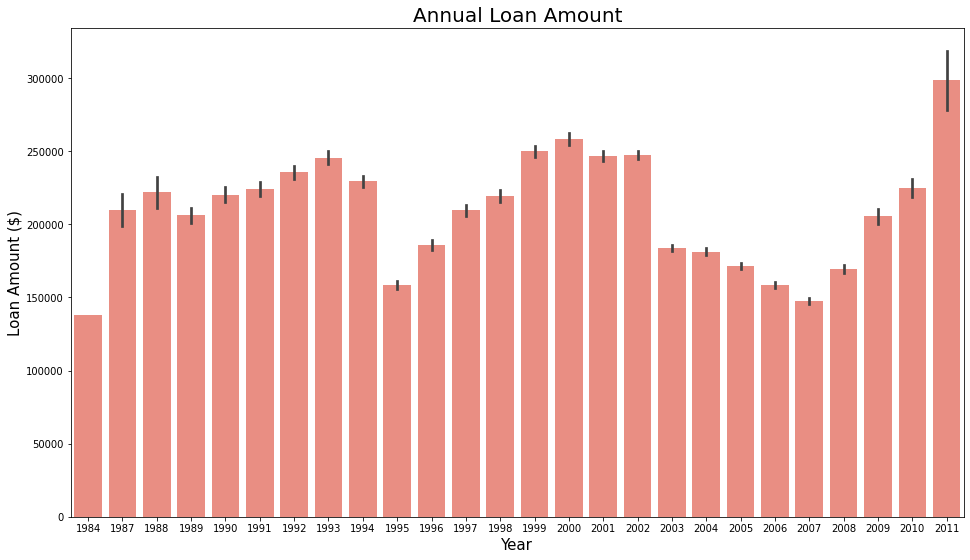

In [38]:
f, ax = plt.subplots(figsize=(16,9))

sns.barplot(x = "ApprovalFY", 
            y = "DisbursementGross", 
            color = 'Salmon', 
            data = SBAdata)

plt.title('Annual Loan Amount', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Loan Amount ($)', fontsize=15)
cv2.waitKey(0)
SBAdata.DisbursementGross.describe()


## 4.2.Total Loans by Sector

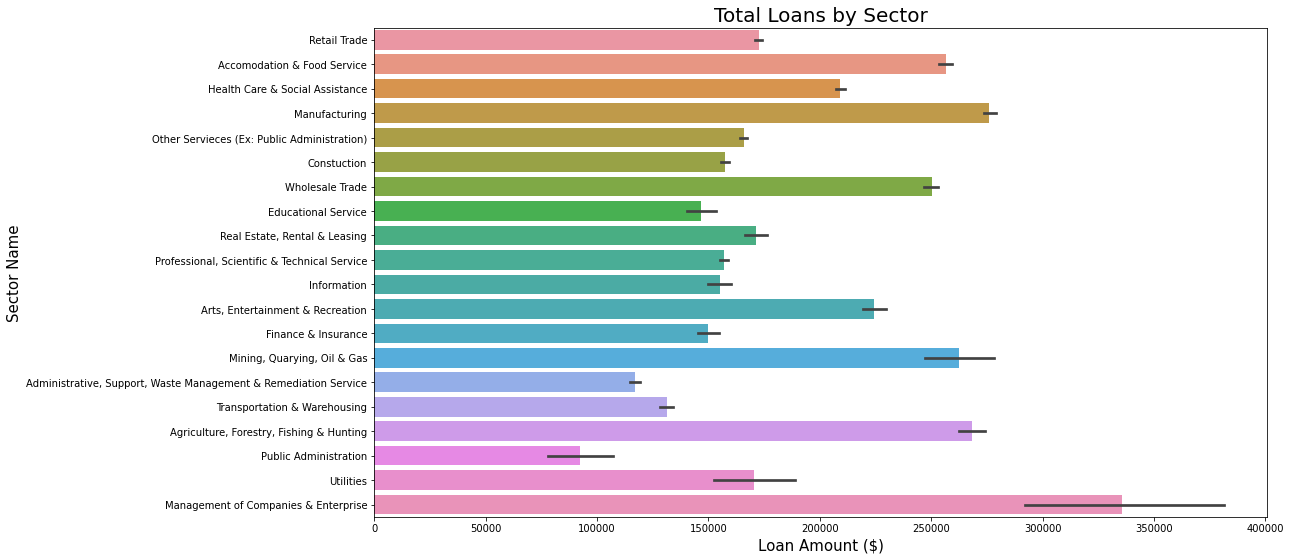

In [39]:
f, ax = plt.subplots(figsize=(16,9))

sns.barplot(x = "DisbursementGross", 
            y = "Sector_name", 
            data = SBAdata)

plt.title('Total Loans by Sector', fontsize=20)
plt.xlabel('Loan Amount ($)', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.show()
cv2.waitKey(0)

plt.show()

## 4.3.Total Payment and Failure to Pay Each Year

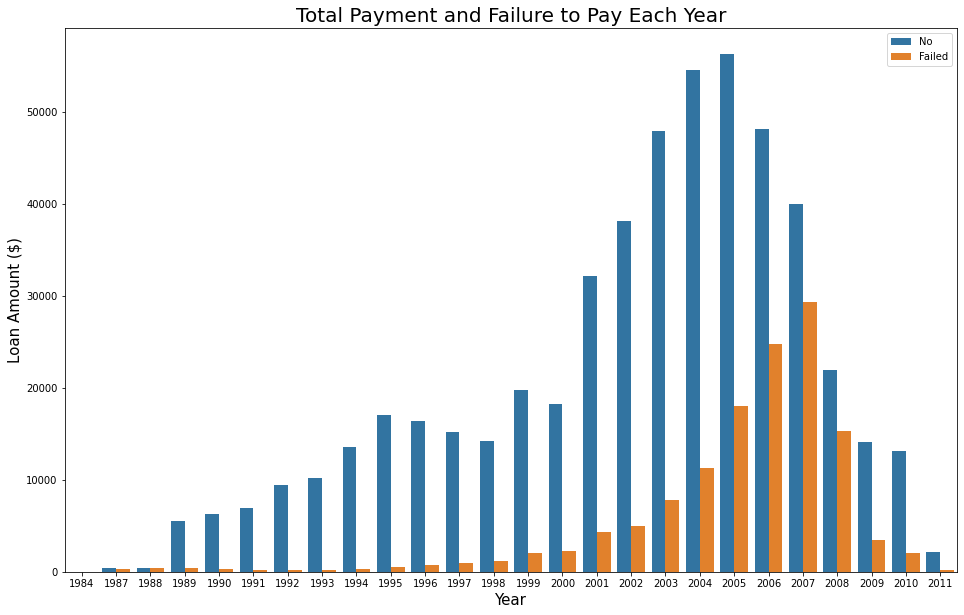

In [40]:
SBAdata.groupby('Sector_name')['DisbursementGross'].describe().style.highlight_max(
    color = 'violet'
).highlight_min(color = 'yellow')

f, ax = plt.subplots(figsize=(16,10))

sns.countplot(x="ApprovalFY", data = SBAdata, hue = 'MIS_Status')

plt.title('Total Payment and Failure to Pay Each Year', fontsize=20)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Loan Amount ($)', fontsize=15)
plt.legend(["No", "Failed"],loc='upper right')
plt.show()

## 4.4.Amount Failed to Pay Based on Sector

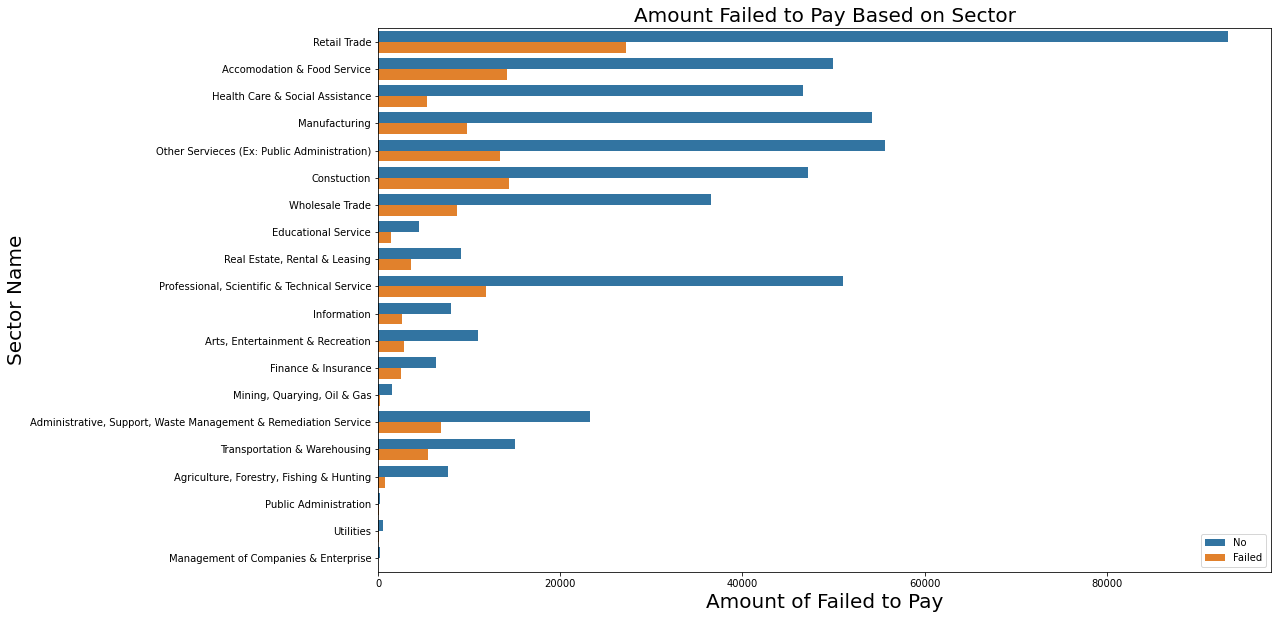

In [41]:
f, ax = plt.subplots(figsize=(16,10))

sns.countplot(y = "Sector_name", hue = "MIS_Status", data = SBAdata)

plt.title('Amount Failed to Pay Based on Sector', fontsize=20)

plt.xlabel('Amount of Failed to Pay', fontsize=20)
plt.ylabel('Sector Name', fontsize=20)

plt.legend(["No", "Failed"],loc='lower right')

plt.show()


## 4.5.Number of Active Recessions by Sector

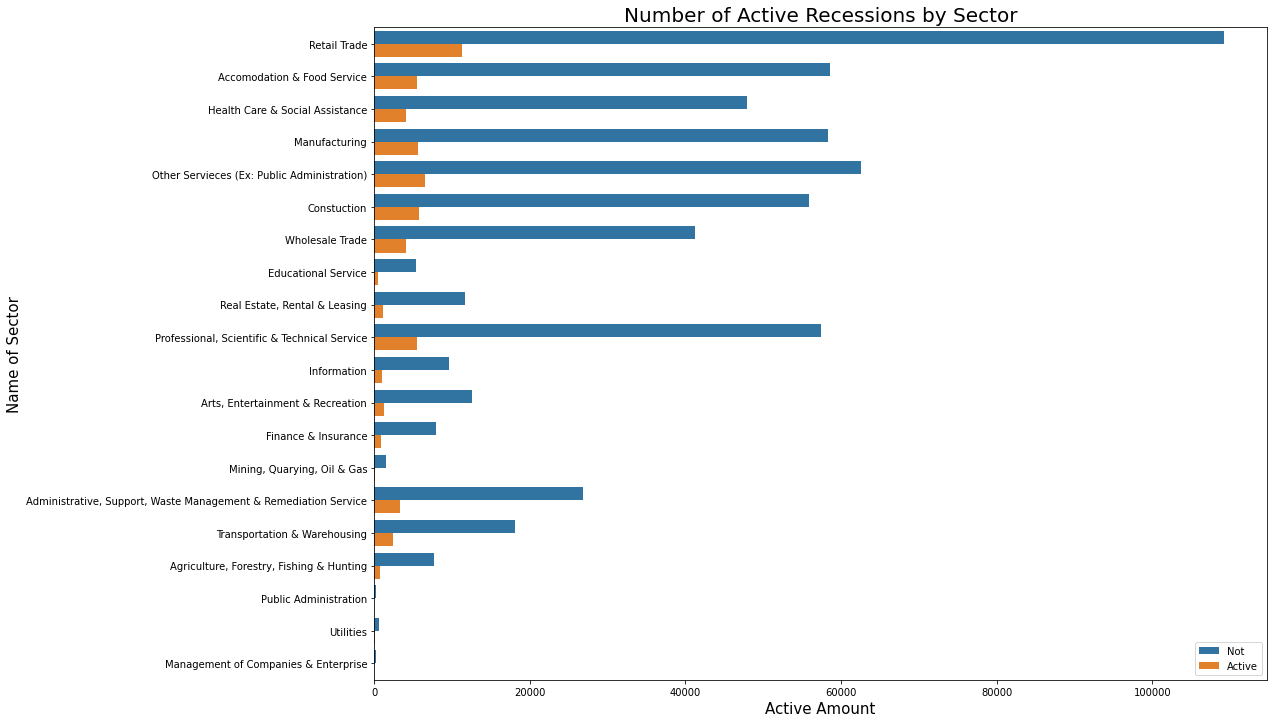

In [42]:
pd.DataFrame(SBAdata.groupby('Sector_name')['MIS_Status'].value_counts()).unstack(
    level = 1
).style.highlight_max(color='yellow').highlight_min(color='violet')

f, ax = plt.subplots(figsize=(16,12))

sns.countplot(y = "Sector_name", 
              hue = "Recession", data = SBAdata)

plt.title('Number of Active Recessions by Sector', fontsize = 20)

plt.xlabel('Active Amount', fontsize = 15)
plt.ylabel('Name of Sector', fontsize = 15)

plt.legend(["Not", "Active"],loc = 'lower right')
plt.show()

## 4.6.Number of Sectors That Have Property Guarantees

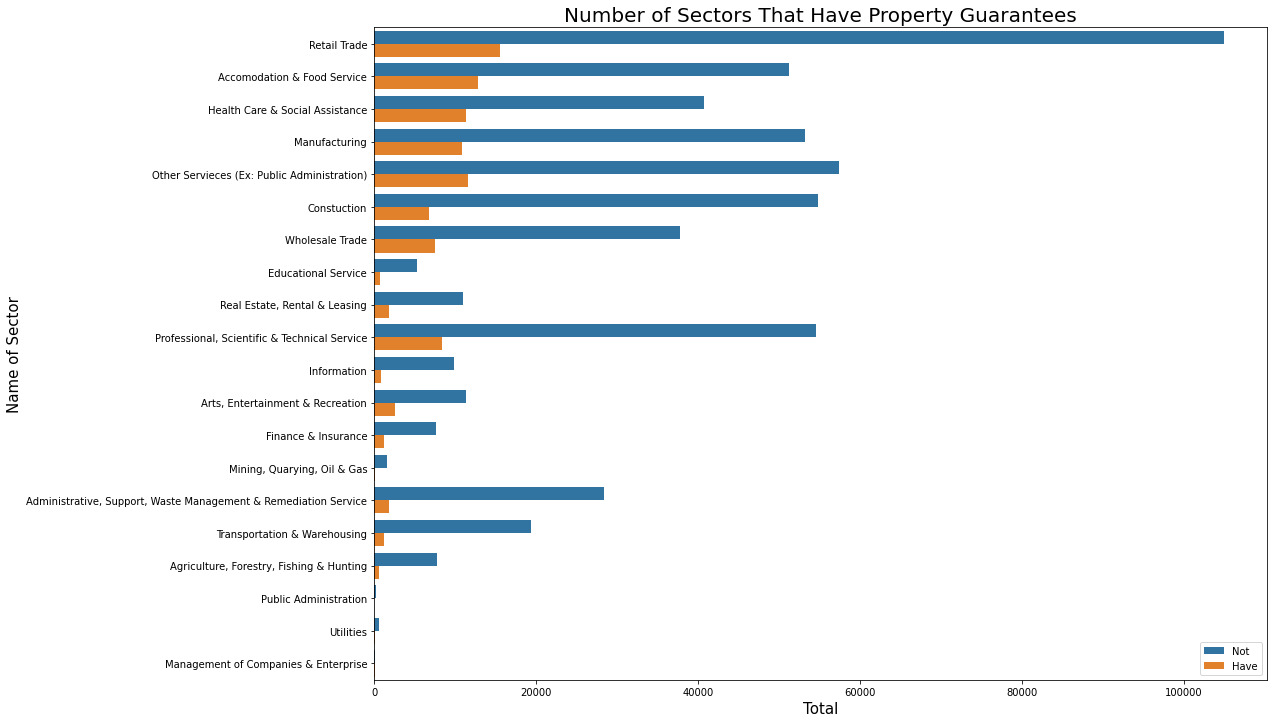

In [43]:
f, ax = plt.subplots(figsize=(16,12))

sns.countplot(y = "Sector_name", hue = "RealEstate", data = SBAdata)

plt.title('Number of Sectors That Have Property Guarantees', fontsize=20)

plt.xlabel('Total', fontsize=15)
plt.ylabel('Name of Sector', fontsize=15)

plt.legend(["Not", "Have"],loc='lower right')
plt.show()


## 4.7.Describe and plotting the old loans according to sectors name

In [44]:
pd.DataFrame(SBAdata.groupby('Sector_name')[
    'RealEstate'
].value_counts()).unstack(
    level = 1
).style.highlight_max(color='yellow').highlight_min(color='violet')

SBAdata['Term'].describe()

count    653377.000000
mean        104.191121
std          75.404780
min           0.000000
25%          60.000000
50%          84.000000
75%         120.000000
max         569.000000
Name: Term, dtype: float64

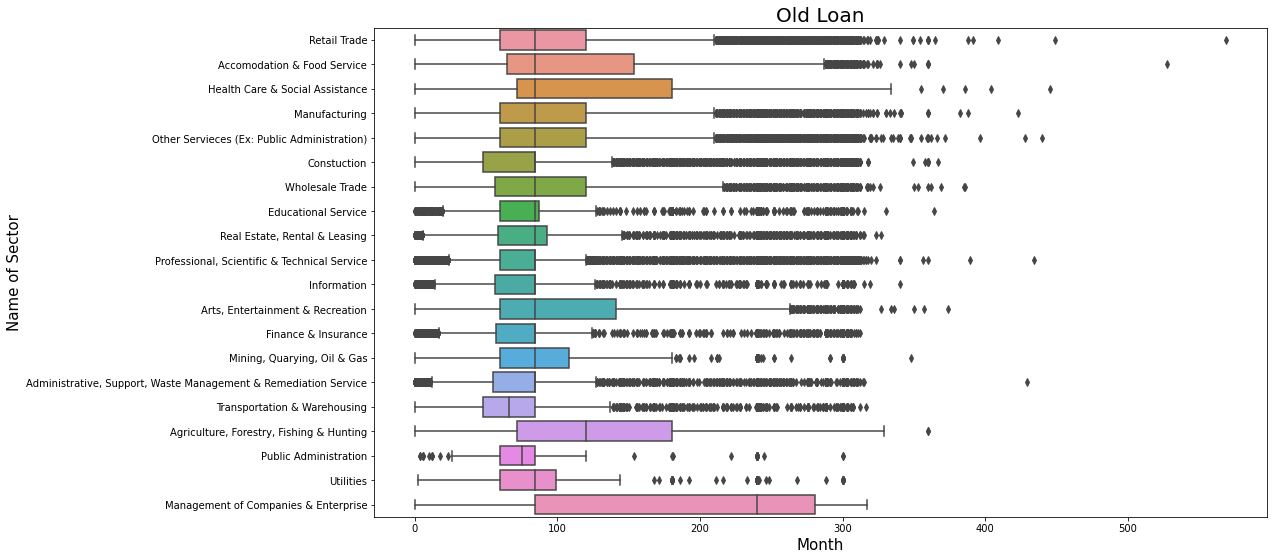

In [45]:
f, ax = plt.subplots(figsize=(16,9))

sns.boxplot(x = "Term", y = "Sector_name", data = SBAdata)

plt.title('Old Loan', fontsize=20)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Name of Sector', fontsize=15)

plt.show()

## 4.8.Describing the Terms according to the sectors

In [46]:
SBAdata.groupby('Sector_name')[
    'Term'
].describe().style.highlight_max(color = 'yellow').highlight_min(color = 'violet')





,count,mean,std,min,25%,50%,75%,max
Sector_name,,,,,,,,
Accomodation & Food Service,64059.000000,120.668930,80.004442,0.000000,65.000000,84.000000,154.000000,527.000000
"Administrative, Support, Waste Management & Remediation Service",30189.000000,81.668687,55.197328,0.000000,55.000000,84.000000,84.000000,429.000000
"Agriculture, Forestry, Fishing & Hunting",8404.000000,119.735245,65.941232,0.000000,72.000000,120.000000,180.000000,360.000000
"Arts, Entertainment & Recreation",13808.000000,114.865151,77.241950,0.000000,60.000000,84.000000,141.250000,374.000000
Constuction,61622.000000,88.453848,71.232112,0.000000,48.000000,84.000000,84.000000,367.000000
Educational Service,5957.000000,95.106094,68.127575,0.000000,60.000000,84.000000,87.000000,364.000000
Finance & Insurance,8843.000000,97.702250,74.866735,0.000000,57.000000,84.000000,84.000000,312.000000
Health Care & Social Assistance,52021.000000,124.771438,82.270722,0.000000,72.000000,84.000000,180.000000,445.000000
Information,10634.000000,85.161275,60.284219,0.000000,56.000000,84.000000,84.000000,340.000000


## 4.9.Number of jobs that has been created according to the sectors

In [47]:
pd.DataFrame(SBAdata.groupby('Sector_name')[
    'Is_CreatedJob'
].value_counts()).unstack(level=1).style.highlight_max(color = 'yellow').highlight_min(color = 'violet')

## 4.10.Number of New jobs according the sectors 

In [48]:
pd.DataFrame(SBAdata.groupby('Sector_name')[
    'NewExist'
].value_counts()).unstack(level = 1).style.highlight_max(color = 'yellow').highlight_min(color = 'violet')


## 4.11.Feature Importance

In [49]:
SBAdata = SBAdata.drop(axis =1, columns = ['LoanNr_ChkDgt','City','State', 'Zip', 'UrbanRural', 'LowDoc',
                                    'ApprovalDate', 'ApprovalFY', 'SBA_Appv','DisbursementDate', 
                                     'Sector_name','BalanceGross', 'ChgOffPrinGr'])


In [50]:
SBAdata['DisbursementGross'] = np.log(SBAdata['DisbursementGross'])


In [51]:
outliers1_drop = SBAdata[(SBAdata['DisbursementGross'] > 14.9)].index
SBAdata.drop(outliers1_drop, inplace=True)

In [52]:
SBAdata['GrAppv'] = np.log(SBAdata['GrAppv'])


In [53]:
outliers2_drop = SBAdata[(SBAdata['GrAppv'] < 7.5)].index
SBAdata.drop(outliers2_drop, inplace=True)


In [54]:
wrong_input = SBAdata[(SBAdata['NoEmp'] == 0)].index
SBAdata.drop(wrong_input, inplace=True)

In [55]:
SBAdata['NoEmp']= stats.boxcox(SBAdata['NoEmp'])[0]


In [56]:
outliers3_drop = SBAdata[(SBAdata['NoEmp'] > 3.3)].index
SBAdata.drop(outliers3_drop, inplace=True)


In [57]:
wrong_input_2 = SBAdata[(SBAdata['Term'] < 75)].index
wrong_input_3 = SBAdata[(SBAdata['Term'] > 276)].index
SBAdata.drop(wrong_input_2, inplace=True)
SBAdata.drop(wrong_input_3, inplace=True)

In [58]:
y = SBAdata['MIS_Status']
X = SBAdata.drop(columns=['MIS_Status'], axis=1)

In [59]:
model = XGBClassifier()
model.fit(X,y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

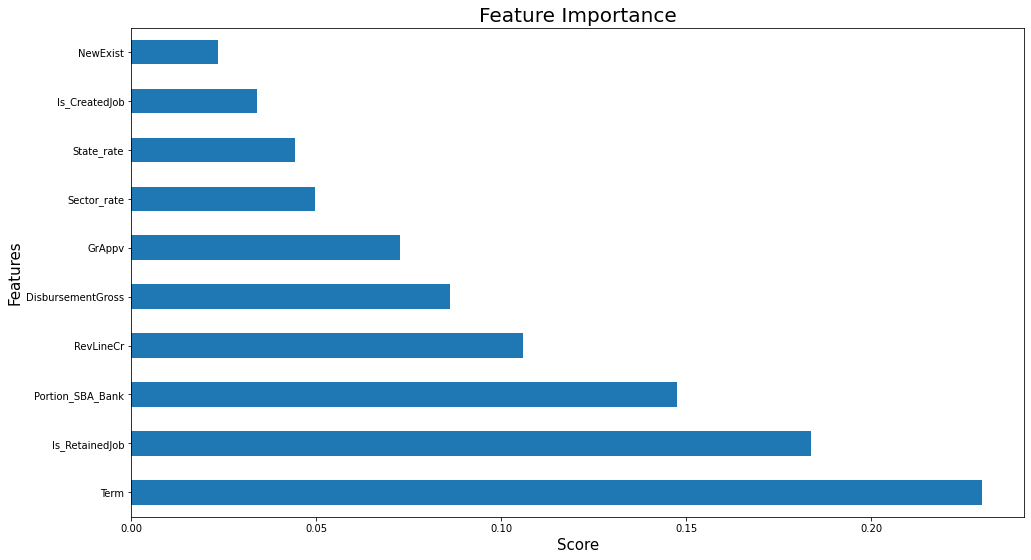

-1

In [60]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

f, ax = plt.subplots(figsize = (16,9))

feat_importances.nlargest(10).plot(kind = 'barh')

plt.title('Feature Importance', fontsize = 20)
plt.ylabel('Features', fontsize = 15)
plt.xlabel('Score', fontsize = 15)

plt.show()
cv2.waitKey(0)

In [61]:
SBAdata = SBAdata[['RevLineCr', 'Term', 'Portion_SBA_Bank', 'GrAppv', 'State_rate', 'DisbursementGross',
            'Is_RetainedJob', 'Sector_rate', 'Recession', 'Is_CreatedJob', 'MIS_Status']]
SBAdata.shape

(378578, 11)

In [62]:
SBAdata.MIS_Status.value_counts()


0    357073
1     21505
Name: MIS_Status, dtype: int64

# 5.Balancing The Data

In [63]:
# import the resampling module from Scikit-Learn
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = SBAdata[SBAdata['MIS_Status'] == 0]
df_minority = SBAdata[SBAdata['MIS_Status'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace = True,     # sample with replacement
                                 n_samples = 357073,    # to match majority class
                                 random_state = 21505) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# the number of the new class data after upsampling 
df_upsampled['MIS_Status'].value_counts()


# reference to help me for this part is : https://elitedatascience.com/imbalanced-classes


1    357073
0    357073
Name: MIS_Status, dtype: int64

# 6.Spliting the dataset into Train & Test set

In [64]:
y = SBAdata['MIS_Status']
X = SBAdata.drop(columns=['MIS_Status'], axis = 1)
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size = 0.25, 
    random_state = 27, 
    stratify = y)

# 7.Define the model_evaluation for evaluating the models

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve
 
# Import Modelling Algoritms
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

def model_evaluation(algo,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_train_ypred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,-1]

    y_test_ypred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,-1]
    y_probas = algo.predict_proba(X_test)
    
    # Confussion Matrix
    cv2.waitKey(0)
    plot_confusion_matrix(algo, X_test, y_test)
    plt.show() 
    print('='*100)
    print('Classification Report: \n', classification_report(y_test, y_test_ypred, digits=3))
    print('='*100)
   
    # ROC Curve
    
    skplt.metrics.plot_roc(y_test, y_probas,figsize=(16,9))

# 8.Classification Models

## 8.1.SVM (Support-Vector Machine)

Accuracy: 0.9431982672090443
Precision: 0.0
Recall: 0.0


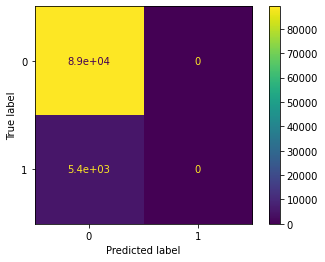

Classification Report: 
               precision    recall  f1-score   support

           0      0.943     1.000     0.971     89269
           1      0.000     0.000     0.000      5376

    accuracy                          0.943     94645
   macro avg      0.472     0.500     0.485     94645
weighted avg      0.890     0.943     0.916     94645



In [66]:
# from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
 
#Train the model using the training sets
clf.fit(X_train, y_train)
from sklearn import metrics

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
 
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
plot_confusion_matrix(clf,X_test, y_test)
plt.show()
cv2.waitKey(0) 
print('='*100)
print('Classification Report: \n', classification_report(y_test, y_pred, digits=3))
print('='*100)


## 8.2.Decision Tree 

### Learning by the defined function

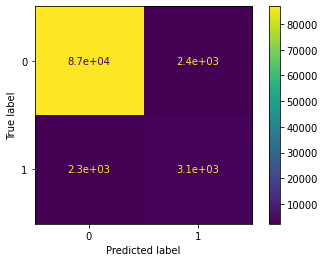

Classification Report: 
               precision    recall  f1-score   support

           0      0.975     0.973     0.974     89269
           1      0.567     0.579     0.573      5376

    accuracy                          0.951     94645
   macro avg      0.771     0.776     0.774     94645
weighted avg      0.951     0.951     0.951     94645



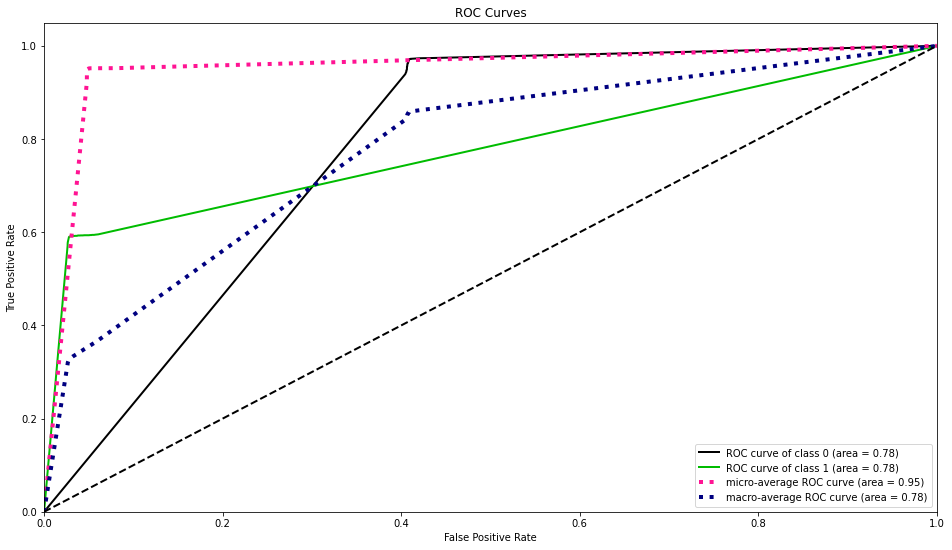

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_evaluation(dt,X_train,y_train,X_test,y_test)

## 8.3.Logistic Regression

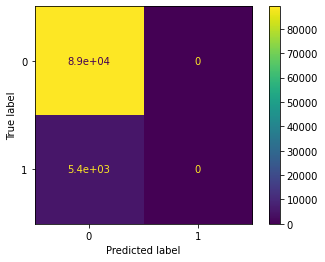

Classification Report: 
               precision    recall  f1-score   support

           0      0.943     1.000     0.971     89269
           1      0.000     0.000     0.000      5376

    accuracy                          0.943     94645
   macro avg      0.472     0.500     0.485     94645
weighted avg      0.890     0.943     0.916     94645



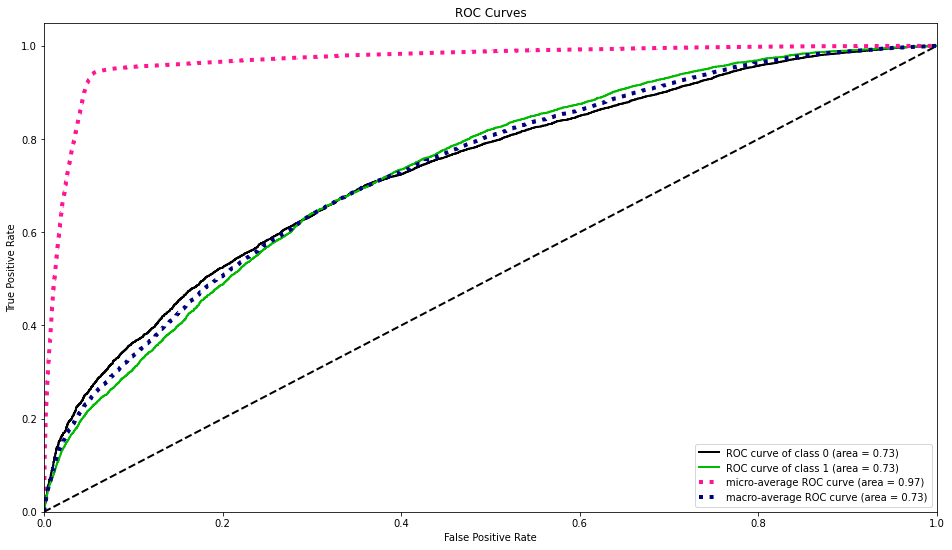

In [69]:
lr = LogisticRegression()

model_evaluation(lr,X_train,y_train,X_test,y_test)

## 8.4.Random Forest 

### 8.4.1.Hyperparameters Tuning Using GridSearch

In [70]:
parameters = {
    'n_estimators':[10,100],'max_features':('auto', 'sqrt','log2'),
    'bootstrap':(True, False),'max_depth':[2,100],}

In [71]:
from sklearn.model_selection import GridSearchCV

ens_clf2 = RandomForestClassifier() 
# estimate the best set of hyper-parameter
ens_cv = GridSearchCV(ens_clf2,parameters, cv=3, verbose=2,n_jobs=4) 


## the model is learn but i comment. because it takes a long time but I show the result in next 
## Markdown

ens_cv.fit(X_train, y_train)
ens_cv.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:  9.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 8.4.2.Fitting and Evaluation

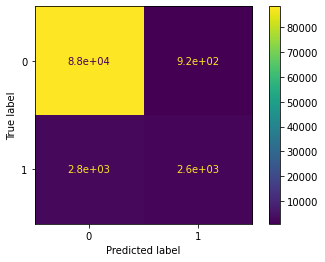

Classification Report: 
               precision    recall  f1-score   support

           0      0.970     0.990     0.980     89269
           1      0.740     0.486     0.587      5376

    accuracy                          0.961     94645
   macro avg      0.855     0.738     0.783     94645
weighted avg      0.957     0.961     0.957     94645



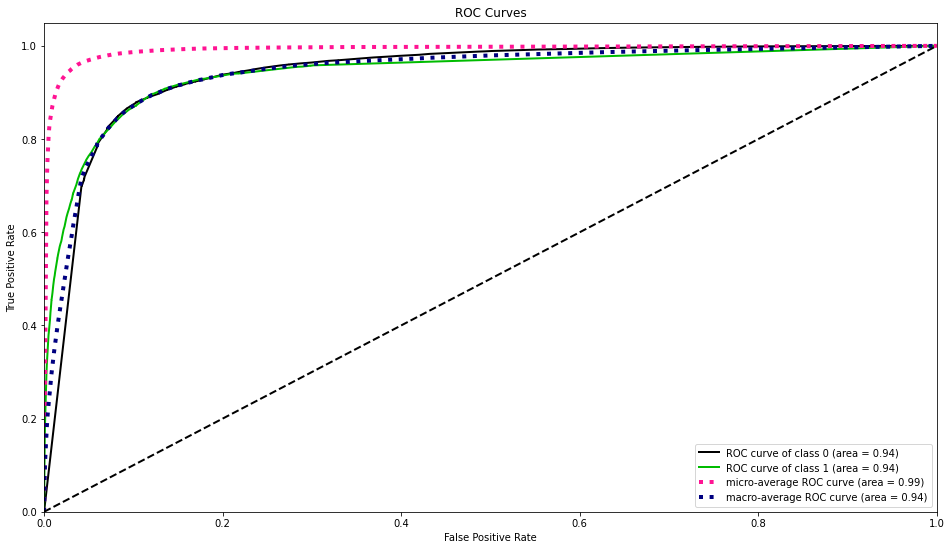

In [72]:
rf = RandomForestClassifier()
model_evaluation(rf,X_train,y_train,X_test,y_test)